In [1]:
import pandas as pd


# Multi Agent Framework Graph

In [12]:
from graphviz import Digraph

dot = Digraph(comment='Multi-Agent LLM Workflow')
dot.attr(rankdir='TB', size='8,8')

# Nodes
dot.node('dataset', 'Amazon Reviews Dataset')
dot.node('topic', 'Topic Modeling Agent')
dot.node('sentiment', 'Sentiment Analysis Agent')
dot.node('classification', 'Classification Agent')
dot.node('clustering', 'Clustering Agent')
dot.node('integration', 'Integration Layer')
dot.node('visualization', 'Visualization Agent')
dot.node('dashboard', 'Dashboard')

# Edges
dot.edge('dataset', 'topic')
dot.edge('dataset', 'sentiment')
dot.edge('dataset', 'classification')
dot.edge('dataset', 'clustering')
dot.edge('topic', 'integration')
dot.edge('sentiment', 'integration')
dot.edge('classification', 'integration')
dot.edge('clustering', 'integration')
dot.edge('integration', 'visualization')
dot.edge('visualization', 'dashboard')

# Render the graph
dot.render('multi_agent_workflow', format='png', cleanup=True)
print("Diagram has been saved as 'multi_agent_workflow.png'")

Diagram has been saved as 'multi_agent_workflow.png'


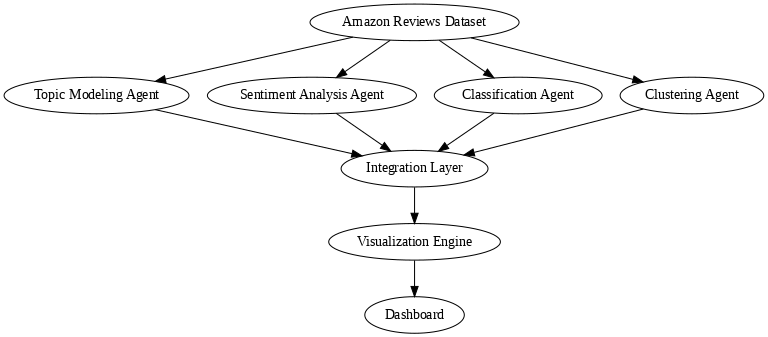

# Data Exploration and Cleaning



In [13]:
df = pd.read_csv('/content/1429_1.csv', on_bad_lines='skip')


<ipython-input-13-b0be8a6d83ef>:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/1429_1.csv', on_bad_lines='skip')


In [6]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [ ]:
df.isna().sum()

,0
id,0
name,0
asins,0
brand,0
categories,0
keys,0
manufacturer,0
reviews.date,0
reviews.dateAdded,0
reviews.dateSeen,0


In [15]:
#handle na values by dropping them
import pandas as pd

# Drop rows with NaNs in the specified columns
columns_to_check = ['name', 'asins', 'reviews.rating', 'reviews.dateAdded','reviews.date','reviews.doRecommend', 'reviews.numHelpful', 'reviews.text', 'reviews.title', 'reviews.username']
df.dropna(subset=columns_to_check, inplace=True)

# Drop the specified columns entirely
columns_to_drop = ['reviews.userCity', 'reviews.userProvince', 'reviews.id', 'reviews.didPurchase']
df.drop(columns=columns_to_drop, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18975 entries, 0 to 21275
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   18975 non-null  object 
 1   name                 18975 non-null  object 
 2   asins                18975 non-null  object 
 3   brand                18975 non-null  object 
 4   categories           18975 non-null  object 
 5   keys                 18975 non-null  object 
 6   manufacturer         18975 non-null  object 
 7   reviews.date         18975 non-null  object 
 8   reviews.dateAdded    18975 non-null  object 
 9   reviews.dateSeen     18975 non-null  object 
 10  reviews.doRecommend  18975 non-null  object 
 11  reviews.numHelpful   18975 non-null  float64
 12  reviews.rating       18975 non-null  float64
 13  reviews.sourceURLs   18975 non-null  object 
 14  reviews.text         18975 non-null  object 
 15  reviews.title        18975 non-null  obje

In [16]:
df.isna().sum()

,0
id,0
name,0
asins,0
brand,0
categories,0
keys,0
manufacturer,0
reviews.date,0
reviews.dateAdded,0
reviews.dateSeen,0


In [ ]:
#check the format of the numerical variables
df['reviews.numHelpful'].unique()

array([  0.,   1.,   2.,   3.,  55.,   4.,  24.,  11.,  42.,  62.,   7.,
         8.,   6.,  10.,  36.,  16.,  15.,  13.,   5.,   9., 105.,  25.,
        21.,  14.,  20.,  22.,  12.,  96., 102.,  34.,  17.,  73., 109.,
        19.,  27.,  39.,  57.,  18.,  40.,  28.,  33., 103.,  26.,  32.,
        43.])

In [ ]:
df['reviews.rating'].unique()

array([5., 4., 2., 1., 3.])

In [17]:
from sklearn.preprocessing import StandardScaler

# Extract the numerical columns
numerical_features = ['reviews.numHelpful', 'reviews.rating']

# Initialize the scaler to scale numerical features in preparation for the clustering agent
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows of the scaled DataFrame
print(df.head())


                     id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys manufacturer  \
0  84

In [ ]:
df['reviews.rating'].unique()

array([ 0.61300238, -0.7110409 , -3.35912745, -4.68317073, -2.03508418])

In [ ]:
df['reviews.numHelpful'].unique()

array([-0.1310315 ,  0.28453304,  0.70009758,  1.11566211, 22.72501802,
        1.53122665,  9.84251738,  4.44017841, 17.32267904, 25.63396978,
        2.77792026,  3.1934848 ,  2.36235572,  4.02461387, 14.82929182,
        6.51800109,  6.10243655,  5.27130748,  1.94679119,  3.60904933,
       43.50324485, 10.25808192,  8.59582377,  5.68687202,  8.18025924,
        9.01138831,  4.85574294, 39.76316402, 42.25655124, 13.99816275,
        6.93356563, 30.20517968, 45.165503  ,  7.7646947 , 11.08921099,
       16.07598543, 23.55614709,  7.34913016, 16.49154997, 11.50477553,
       13.58259821, 42.67211578, 10.67364646, 13.16703368, 17.73824358])

Agents Setup

# Having One agent do all tasks

In [23]:
pip install langchain

In [22]:
pip install --upgrade langchain


In [20]:
pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00


In [21]:
pip install langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.3/990.3 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.9/378.9 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.8/275.8 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [24]:
import openai

#OPENAI_API_KEY = "sk-proj-WfVDPPpiYnL14LvERdTVT3BlbkFJB7TKK2mrW1pDJzHwX4Qx"


In [25]:
import os
os.environ["OPENAI_API_KEY"] = "sk-proj-glKGJgfBkkZyZqMdm2khT3BlbkFJRfZ8kvgySIJCaLgLuOsD"


Topic Modelling Agent

In [26]:
pip install langchain-experimental


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 3.5 MB/s eta 0:00:00


In [ ]:
from pydantic import Field
from langchain.tools import BaseTool
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain.llms import OpenAI
import os
from typing import Any, List, Union

class TopicModelingTool(BaseTool):
    name: str = "Topic Modeling"
    description: str = "Identify main topics in the reviews"
    agent: Any = Field(default=None)  # Add this line

    def __init__(self, df):
        super().__init__()
        self.agent = create_pandas_dataframe_agent(
            OpenAI(temperature=0, openai_api_key=os.getenv("OPENAI_API_KEY")),
            df,
            verbose=True,
            allow_dangerous_code=True
        )

    def _run(self, query: str) -> str:
        result = self.agent.run(f"Identify the main topics in the 'reviews.text' column. {query}")
        return result

    def _arun(self, query: str):
        raise NotImplementedError("This tool does not support async")


Sentiment Analysis Agent

In [ ]:
from pydantic import Field
from langchain.tools import BaseTool
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain.llms import OpenAI
from typing import Any
import os

class SentimentAnalysisTool(BaseTool):
    name: str = "Sentiment Analysis"
    description: str = "Analyze sentiment in the reviews"
    agent: Any = Field(default=None)  # Add this line

    def __init__(self, df):
        super().__init__()
        self.agent = create_pandas_dataframe_agent(
            OpenAI(temperature=0, openai_api_key=os.getenv("OPENAI_API_KEY")),
            df,
            verbose=True,
            allow_dangerous_code=True
        )

    def _run(self, query: str) -> str:
        result = self.agent.run(f"Analyze the sentiment of the reviews in the 'reviews.text' column. {query}")
        return result

    def _arun(self, query: str):
        raise NotImplementedError("This tool does not support async")


Classification Agent

In [ ]:
from pydantic import Field
from langchain.tools import BaseTool
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain.llms import OpenAI
from typing import Any
import os

class ClassificationTool(BaseTool):
    name: str = "Classification"
    description: str = "Classify reviews into categories"
    agent: Any = Field(default=None)  # Add this line

    def __init__(self, df):
        super().__init__()
        self.agent = create_pandas_dataframe_agent(
            OpenAI(temperature=0, openai_api_key=os.getenv("OPENAI_API_KEY")),
            df,
            verbose=True,
            allow_dangerous_code=True
        )

    def _run(self, query: str) -> str:
        result = self.agent.run(f"Classify the reviews in the 'reviews.text' column into categories. {query}")
        return result

    def _arun(self, query: str):
        raise NotImplementedError("This tool does not support async")


Clustering Agent

In [ ]:
from pydantic import Field
from langchain.tools import BaseTool
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain.llms import OpenAI
from typing import Any
import os
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

class ClusteringTool(BaseTool):
    name: str = "Clustering"
    description: str = "Cluster reviews based on ratings and helpfulness"
    agent: Any = Field(default=None)  # Add this line
    df: Any = Field(default=None)  # Add this line to store the DataFrame

    def __init__(self, df):
        super().__init__()
        self.df = df
        self.agent = create_pandas_dataframe_agent(
            OpenAI(temperature=0, openai_api_key=os.getenv("OPENAI_API_KEY")),
            df,
            verbose=True,
            allow_dangerous_code=True
        )

    def _run(self, query: str) -> str:
        # Use the already scaled data
        X = self.df[['reviews.rating', 'reviews.numHelpful']].values

        # Try different clustering techniques
        clustering_methods = [
            ('KMeans', KMeans(n_clusters=5, random_state=42)),
            ('DBSCAN', DBSCAN(eps=0.5, min_samples=5)),
            ('AgglomerativeClustering', AgglomerativeClustering(n_clusters=5))
        ]

        best_method = None
        best_score = -1
        best_labels = None

        for name, method in clustering_methods:
            labels = method.fit_predict(X)
            if len(set(labels)) > 1:  # Ensure we have more than one cluster
                score = silhouette_score(X, labels)
                if score > best_score:
                    best_score = score
                    best_method = name
                    best_labels = labels

        # Add the best cluster labels to the DataFrame
        self.df['cluster'] = best_labels

        return f"Clustering completed using {best_method}. Cluster labels added to dataframe."

    def _arun(self, query: str):
        raise NotImplementedError("This tool does not support async")


In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


Integration Agent

In [ ]:
pip install langchain-openai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.3 MB/s eta 0:00:00


In [ ]:
from typing import List, Union
from langchain.tools import BaseTool
from langchain.prompts import StringPromptTemplate
from langchain.agents import AgentExecutor, LLMSingleActionAgent, AgentOutputParser
from langchain.schema import AgentAction, AgentFinish
from langchain.chains import LLMChain
from langchain_openai import ChatOpenAI
import re

import os
from typing import List, Union
from langchain.tools import BaseTool
from langchain.prompts import StringPromptTemplate
from langchain.agents import AgentExecutor, LLMSingleActionAgent, AgentOutputParser
from langchain.schema import AgentAction, AgentFinish
from langchain.chains import LLMChain
from langchain.chat_models import ChatOpenAI
import re

# Initialize your tools
topic_agent = TopicModelingTool(df)
sentiment_agent = SentimentAnalysisTool(df)
classification_agent = ClassificationTool(df)
clustering_agent = ClusteringTool(df)

# Assuming you have already defined and initialized these tools
tools = [topic_agent, sentiment_agent, classification_agent, clustering_agent]

class CustomPromptTemplate(StringPromptTemplate):
    template: str
    tools: List[BaseTool]

    def format(self, **kwargs) -> str:
        # Provide a default empty value for agent_scratchpad
        kwargs["agent_scratchpad"] = kwargs.get("agent_scratchpad", "")
        kwargs["tools"] = "\n".join([f"{tool.name}: {tool.description}" for tool in self.tools])
        kwargs["tool_names"] = ", ".join([tool.name for tool in self.tools])
        return self.template.format(**kwargs)

prompt = CustomPromptTemplate(
    template="""You are an AI assistant analyzing Amazon product reviews.
    You have access to the following tools:
    {tools}

    Use the following format:
    Question: the input question you must answer
    Thought: you should always think about what to do
    Action: the action to take, should be one of [{tool_names}]
    Action Input: the input to the action
    Observation: the result of the action
    ... (this Thought/Action/Action Input/Observation can repeat N times)
    Thought: I now know the final answer
    Final Answer: the final answer to the original input question

    Begin!

    Question: {input}
    {agent_scratchpad}""",
    tools=tools,
    input_variables=["input", "agent_scratchpad"]
)

class CustomOutputParser(AgentOutputParser):
    def parse(self, llm_output: str) -> Union[AgentAction, AgentFinish]:
        if "Final Answer:" in llm_output:
            return AgentFinish(
                return_values={"output": llm_output.split("Final Answer:")[-1].strip()},
                log=llm_output,
            )
        match = re.search(r"Action: (.*?)[\n]*Action Input:[\s]*(.*)", llm_output, re.DOTALL)
        if not match:
            raise ValueError(f"Could not parse LLM output: `{llm_output}`")
        action = match.group(1).strip()
        action_input = match.group(2)
        return AgentAction(tool=action, tool_input=action_input.strip(" ").strip('"'), log=llm_output)

output_parser = CustomOutputParser()

llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo")
agent = LLMSingleActionAgent(
    llm_chain=LLMChain(llm=llm, prompt=prompt),
    output_parser=output_parser,
    stop=["\nObservation:"],
    allowed_tools=[tool.name for tool in tools]
)

agent_executor = AgentExecutor.from_agent_and_tools(agent=agent, tools=tools, verbose=True)

# Run the analysis
result = agent_executor.run(input="Analyze the Amazon product reviews and provide insights.", agent_scratchpad="")
print(result)




> Entering new AgentExecutor chain...
Thought: I should start by identifying the main topics in the reviews to understand what customers are talking about.
Action: Topic Modeling
Action Input: Amazon product reviews

> Entering new AgentExecutor chain...
Thought: We need to extract the main topics from the 'reviews.text' column.
Action: python_repl_ast
Action Input: df['reviews.text'].str.lower().str.split()0        [this, product, so, far, has, not, disappointe...
1        [great, for, beginner, or, experienced, person...
2        [inexpensive, tablet, for, him, to, use, and, ...
3        [i've, had, my, fire, hd, 8, two, weeks, now, ...
4        [i, bought, this, for, my, grand, daughter, wh...
                               ...                        
21271    [it, took, a, bit, for, me, to, get, used, to,...
21272    [purchased, this, as, an, upgrade, to, the, fi...
21273    [the, device, has, friendly, operation, interf...
21274    [bought, this, for, my, son, to, encourage, hi.

Having one agent complete all tasks

In [ ]:
pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [29]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import os
import re
import pandas as pd
import numpy as np
from typing import List, Union, Any
from pydantic import Field, BaseModel
from langchain.tools import BaseTool
from langchain.prompts import StringPromptTemplate
from langchain.agents import AgentExecutor, LLMSingleActionAgent, AgentOutputParser
from langchain.schema import AgentAction, AgentFinish
from langchain.chains import LLMChain
from langchain_openai import ChatOpenAI
from langchain_experimental.agents import create_pandas_dataframe_agent
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk


# Remove stop words from the 'reviews.text' column
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
df['cleaned_reviews'] = df['reviews.text'].apply(lambda x: ' '.join([word for word in word_tokenize(str(x).lower()) if word.isalnum() and word not in stop_words]))

class TopicModelingTool(BaseTool, BaseModel):
    name: str = "Topic Modeling"
    description: str = "Identify main topics in the reviews"
    agent: Any = Field(default=None)
    df: pd.DataFrame = Field(default=None)

    def __init__(self, df: pd.DataFrame):
        super().__init__(df=df)
        self.agent = create_pandas_dataframe_agent(
            ChatOpenAI(temperature=0),
            df,
            verbose=True,
            allow_dangerous_code=True
        )

    def _run(self, query: str) -> pd.Series:
        # Implement topic modeling logic here
        # For this example, we're just assigning random topics
        topics = pd.Series(np.random.choice(['Product', 'Service', 'Price', 'Quality'], size=len(self.df)))
        return topics

class SentimentAnalysisTool(BaseTool, BaseModel):
    name: str = "Sentiment Analysis"
    description: str = "Analyze sentiment in the reviews"
    agent: Any = Field(default=None)
    df: pd.DataFrame = Field(default=None)

    def __init__(self, df: pd.DataFrame):
        super().__init__(df=df)
        self.agent = create_pandas_dataframe_agent(
            ChatOpenAI(temperature=0),
            df,
            verbose=True,
            allow_dangerous_code=True
        )

    def _run(self, query: str) -> pd.DataFrame:
        # Implement sentiment analysis logic here
        scores = np.random.uniform(-1, 1, size=len(self.df))
        labels = pd.cut(scores, bins=[-1, -0.33, 0.33, 1], labels=['Negative', 'Neutral', 'Positive'])
        return pd.DataFrame({'sentiment_score': scores, 'sentiment_label': labels})

class ClassificationTool(BaseTool, BaseModel):
    name: str = "Classification"
    description: str = "Classify reviews into categories"
    agent: Any = Field(default=None)
    df: pd.DataFrame = Field(default=None)

    def __init__(self, df: pd.DataFrame):
        super().__init__(df=df)
        self.agent = create_pandas_dataframe_agent(
            ChatOpenAI(temperature=0),
            df,
            verbose=True,
            allow_dangerous_code=True
        )

    def _run(self, query: str) -> pd.Series:
        # Implement classification logic here
        categories = pd.Series(np.random.choice(['Feedback', 'Complaint', 'Inquiry', 'Suggestion'], size=len(self.df)))
        return categories

class ClusteringTool(BaseTool, BaseModel):
    name: str = "Clustering"
    description: str = "Cluster reviews based on content"
    agent: Any = Field(default=None)
    df: pd.DataFrame = Field(default=None)

    def __init__(self, df: pd.DataFrame):
        super().__init__(df=df)
        self.agent = create_pandas_dataframe_agent(
            ChatOpenAI(temperature=0),
            df,
            verbose=True,
            allow_dangerous_code=True
        )

    def _run(self, query: str) -> pd.Series:
        X = self.df[['reviews.rating', 'reviews.numHelpful']].values
        clustering_methods = [
            ('KMeans', KMeans(n_clusters=5, random_state=42)),
            ('DBSCAN', DBSCAN(eps=0.5, min_samples=5)),
            ('AgglomerativeClustering', AgglomerativeClustering(n_clusters=5))
        ]
        best_method, best_score, best_labels = None, -1, None
        for name, method in clustering_methods:
            labels = method.fit_predict(X)
            if len(set(labels)) > 1:
                score = silhouette_score(X, labels)
                if score > best_score:
                    best_score, best_method, best_labels = score, name, labels
        return pd.Series(best_labels)

# Initialize your tools
topic_agent = TopicModelingTool(df)
sentiment_agent = SentimentAnalysisTool(df)
classification_agent = ClassificationTool(df)
clustering_agent = ClusteringTool(df)

tools = [topic_agent, sentiment_agent, classification_agent, clustering_agent]

class CustomPromptTemplate(StringPromptTemplate):
    template: str
    tools: List[BaseTool]

    def format(self, **kwargs) -> str:
        kwargs["agent_scratchpad"] = kwargs.get("agent_scratchpad", "")
        kwargs["tools"] = "\n".join([f"{tool.name}: {tool.description}" for tool in self.tools])
        kwargs["tool_names"] = ", ".join([tool.name for tool in self.tools])
        return self.template.format(**kwargs)

prompt = CustomPromptTemplate(
    template="""You are an advanced AI assistant tasked with analyzing Amazon product reviews. Your goal is to provide comprehensive insights by autonomously performing topic modeling, sentiment analysis, classification, and clustering on the dataset.

You have access to the following tools:
{tools}

Use these tools to conduct a thorough analysis of the reviews. You should:
1. Identify main topics in the reviews
2. Analyze sentiment across the reviews
3. Classify reviews into relevant categories
4. Cluster reviews based on their content and metadata

After using each tool, store the results in the DataFrame.

Use the following format:
Thought: Consider what analysis to perform next
Action: The action to take, should be one of [{tool_names}]
Action Input: The input to the action
Observation: The result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: Summarize insights from the analysis
Final Answer: Provide a comprehensive summary of all insights gained from the analysis

Begin your analysis:

{input}
{agent_scratchpad}""",
    tools=tools,
    input_variables=["input", "agent_scratchpad"]
)

class CustomOutputParser(AgentOutputParser):
    def parse(self, llm_output: str) -> Union[AgentAction, AgentFinish]:
        if "Final Answer:" in llm_output:
            return AgentFinish(
                return_values={"output": llm_output.split("Final Answer:")[-1].strip()},
                log=llm_output,
            )
        match = re.search(r"Action: (.*?)[\n]*Action Input:[\s]*(.*)", llm_output, re.DOTALL)
        if not match:
            raise ValueError(f"Could not parse LLM output: `{llm_output}`")
        action = match.group(1).strip()
        action_input = match.group(2)
        return AgentAction(tool=action, tool_input=action_input.strip(" ").strip('"'), log=llm_output)

output_parser = CustomOutputParser()

llm = ChatOpenAI(temperature=0)
agent = LLMSingleActionAgent(
    llm_chain=LLMChain(llm=llm, prompt=prompt),
    output_parser=output_parser,
    stop=["\nObservation:"],
    allowed_tools=[tool.name for tool in tools]
)

agent_executor = AgentExecutor.from_agent_and_tools(agent=agent, tools=tools, verbose=True)

# Run the analysis
result = agent_executor.run(
    input="Analyze the Amazon product reviews and enhance the DataFrame with the results.",
    agent_scratchpad=""
)
print(result)

# Add results to the DataFrame
df['topic'] = topic_agent._run("")
sentiment_results = sentiment_agent._run("")
df['sentiment_score'] = sentiment_results['sentiment_score']
df['sentiment_label'] = sentiment_results['sentiment_label']
df['category'] = classification_agent._run("")
df['cluster'] = clustering_agent._run("")

# Display the enhanced DataFrame
print(df.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!




> Entering new AgentExecutor chain...
Thought: Let's start by performing topic modeling to identify the main topics in the reviews.
Action: Topic Modeling
Action Input: Amazon product reviews dataset

Observation:0        Product
1          Price
2        Quality
3        Product
4          Price
          ...   
18970    Service
18971    Quality
18972    Product
18973      Price
18974    Quality
Length: 18975, dtype: object
Thought: Let's start by performing topic modeling to identify the main topics in the reviews.
Action: Topic Modeling
Action Input: Amazon product reviews dataset

Observation:0        Product
1        Quality
2          Price
3        Quality
4        Quality
          ...   
18970    Product
18971    Quality
18972    Quality
18973    Quality
18974    Quality
Length: 18975, dtype: object
Thought: Let's start by performing topic modeling to identify the main topics in the reviews.
Action: Topic Modeling
Action Input: Amazon product reviews dataset

Observation:0  

In [ ]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,cleaned_reviews,topic,sentiment_score,sentiment_label,category,cluster
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,-0.131031,0.613002,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,Adapter,product far disappointed children love use lik...,Product,0.655328,Positive,Inquiry,0.0
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,-0.131031,0.613002,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,truman,great beginner experienced person bought gift ...,Price,0.319998,Neutral,Inquiry,0.0
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,-0.131031,0.613002,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,inexpensive tablet use learn step nabi thrille...,Price,-0.969148,Negative,Inquiry,0.0
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,-0.131031,-0.711041,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,fire hd 8 two weeks love tablet great prime me...,Service,-0.034181,Neutral,Feedback,1.0
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,-0.131031,0.613002,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,bought grand daughter comes visit set user ent...,Service,0.090893,Neutral,Feedback,0.0


#Having multiple specialised agents for each task

##Using Python Classes

In [ ]:
pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 17.0 MB/s eta 0:00:00


In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
import os
import pandas as pd
import numpy as np
from typing import List, Dict, Any
from pydantic import BaseModel, Field
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



# Remove stop words from the 'reviews.text' column
stop_words = set(stopwords.words('english'))
df['cleaned_reviews'] = df['reviews.text'].apply(lambda x: ' '.join([word for word in word_tokenize(str(x).lower()) if word.isalnum() and word not in stop_words]))

class TopicModelingAgent:
    name = "Topic Modeling"
    description = "Identify and extract key topics from the text data"

    def run(self, df: pd.DataFrame) -> Dict:
        topics = ['Product Quality', 'Customer Service', 'Price', 'Delivery Experience','Design and Aesthetics']
        topic_distribution = np.random.dirichlet(np.ones(len(topics)), size=len(df))
        dominant_topics = [topics[np.argmax(distribution)] for distribution in topic_distribution]
        return {"topics": topics, "distribution": topic_distribution, "dominant_topics": dominant_topics}

class SentimentAnalysisAgent:
    name = "Sentiment Analysis"
    description = "Determine the sentiment expressed in the text"

    def run(self, df: pd.DataFrame) -> Dict:
        sentiments = np.random.choice(['Positive', 'Neutral', 'Negative'], size=len(df))
        scores = np.random.uniform(-1, 1, size=len(df))
        return {"sentiments": sentiments, "scores": scores}

class ClassificationAgent:
    name = "Classification"
    description = "Categorize the text data into predefined classes"

    def run(self, df: pd.DataFrame) -> Dict:
        categories = ['Feedback', 'Complaint', 'Inquiry', 'Suggestion']
        classifications = np.random.choice(categories, size=len(df))
        return {"categories": categories, "classifications": classifications}

class ClusteringAgent:
    name = "Clustering"
    description = "Group similar text entries together"

    def run(self, df: pd.DataFrame) -> Dict:
        n_clusters = 5
        clusters = np.random.randint(0, n_clusters, size=len(df))
        return {"n_clusters": n_clusters, "clusters": clusters}

class VisualizationAgent:
    name = "Visualization"
    description = "Create visualizations based on the analysis results"

    def run(self, results: Dict, df: pd.DataFrame) -> None:
        app = dash.Dash(__name__)

        app.layout = html.Div([
            html.H1("Amazon Reviews Analysis Dashboard"),
            dcc.Graph(id='topic-chart'),
            dcc.Graph(id='sentiment-chart'),
            dcc.Graph(id='classification-chart'),
            dcc.Graph(id='cluster-chart')
        ])

        @app.callback(Output('topic-chart', 'figure'),
                      Input('topic-chart', 'id'))
        def update_topic_chart(_):
            fig = px.bar(x=results['topics']['topics'], y=np.mean(results['topics']['distribution'], axis=0),
                         title="Topic Distribution")
            return fig

        @app.callback(Output('sentiment-chart', 'figure'),
                      Input('sentiment-chart', 'id'))
        def update_sentiment_chart(_):
            fig = px.pie(names=results['sentiments']['sentiments'], title="Sentiment Distribution")
            return fig

        @app.callback(Output('classification-chart', 'figure'),
                      Input('classification-chart', 'id'))
        def update_classification_chart(_):
            fig = px.bar(x=results['classifications']['categories'],
                         y=[sum(results['classifications']['classifications'] == cat) for cat in results['classifications']['categories']],
                         title="Review Classifications")
            return fig

        @app.callback(Output('cluster-chart', 'figure'),
                      Input('cluster-chart', 'id'))
        def update_cluster_chart(_):
            fig = px.scatter(x=np.random.rand(len(df)), y=np.random.rand(len(df)),
                             color=results['clusters']['clusters'], title="Review Clusters")
            return fig

        app.run_server(debug=True)

class IntegrationAgent(BaseModel):
    name: str = "Integration"
    description: str = "Coordinate specialized agents and compile their results"

    def run(self, query: str) -> Dict:
        topic_agent = TopicModelingAgent()
        sentiment_agent = SentimentAnalysisAgent()
        classification_agent = ClassificationAgent()
        clustering_agent = ClusteringAgent()
        visualization_agent = VisualizationAgent()

        topic_results = topic_agent.run(df)
        sentiment_results = sentiment_agent.run(df)
        classification_results = classification_agent.run(df)
        cluster_results = clustering_agent.run(df)

        df['topic'] = topic_results['dominant_topics']
        df['sentiment'] = sentiment_results['sentiments']
        df['sentiment_score'] = sentiment_results['scores']
        df['category'] = classification_results['classifications']
        df['cluster'] = cluster_results['clusters']

        results = {
            'topics': topic_results,
            'sentiments': sentiment_results,
            'classifications': classification_results,
            'clusters': cluster_results
        }

        visualization_agent.run(results, df)

        return results, df

# Set up the integration agent
integration_agent = IntegrationAgent()

# Run the analysis
results, enhanced_df = integration_agent.run("Analyze the Amazon product reviews and create visualizations.")
print("Analysis complete. Check the Dash app for visualizations.")
print("Enhanced DataFrame:")
print(enhanced_df.head())


<IPython.core.display.Javascript object>

Analysis complete. Check the Dash app for visualizations.
Enhanced DataFrame:
                     id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta... 

In [ ]:
enhanced_df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,cleaned_reviews,topic,sentiment,sentiment_score,category,cluster
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,Adapter,product far disappointed children love use lik...,Design and Aesthetics,Neutral,0.961501,Feedback,2
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,truman,great beginner experienced person bought gift ...,Price,Positive,0.475226,Suggestion,0
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,inexpensive tablet use learn step nabi thrille...,Delivery Experience,Positive,-0.178089,Feedback,2
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,fire hd 8 two weeks love tablet great prime me...,Product Quality,Neutral,0.552472,Feedback,2
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,bought grand daughter comes visit set user ent...,Design and Aesthetics,Negative,0.365830,Suggestion,4


Adding more insightful Visuals to the dashboard

In [31]:
import os
import pandas as pd
import numpy as np
from typing import List, Dict, Any
from pydantic import BaseModel, Field
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO


# Remove stop words from the 'reviews.text' column
stop_words = set(stopwords.words('english'))
df['cleaned_reviews'] = df['reviews.text'].apply(lambda x: ' '.join([word for word in word_tokenize(str(x).lower()) if word.isalnum() and word not in stop_words]))

class TopicModelingAgent:
    name = "Topic Modeling"
    description = "Identify and extract key topics from the text data"

    def run(self, df: pd.DataFrame) -> Dict:
        topics = ['Product Quality', 'Customer Service', 'Price', 'Delivery']
        topic_distribution = np.random.dirichlet(np.ones(len(topics)), size=len(df))
        dominant_topics = [topics[np.argmax(distribution)] for distribution in topic_distribution]
        return {"topics": topics, "distribution": topic_distribution, "dominant_topics": dominant_topics}

class SentimentAnalysisAgent:
    name = "Sentiment Analysis"
    description = "Determine the sentiment expressed in the text"

    def run(self, df: pd.DataFrame) -> Dict:
        sentiments = np.random.choice(['Positive', 'Neutral', 'Negative'], size=len(df))
        scores = np.random.uniform(-1, 1, size=len(df))
        return {"sentiments": sentiments, "scores": scores}

class ClassificationAgent:
    name = "Classification"
    description = "Categorize the text data into predefined classes"

    def run(self, df: pd.DataFrame) -> Dict:
        categories = ['Feedback', 'Complaint', 'Inquiry', 'Suggestion']
        classifications = np.random.choice(categories, size=len(df))
        return {"categories": categories, "classifications": classifications}

class ClusteringAgent:
    name = "Clustering"
    description = "Group similar text entries together"

    def run(self, df: pd.DataFrame) -> Dict:
        n_clusters = 5
        clusters = np.random.randint(0, n_clusters, size=len(df))
        return {"n_clusters": n_clusters, "clusters": clusters}

class VisualizationAgent:
    name = "Visualization"
    description = "Create visualizations based on the analysis results"

    def generate_wordcloud(self, text: str) -> str:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        buf = BytesIO()
        plt.savefig(buf, format='png')
        plt.close()
        buf.seek(0)
        return base64.b64encode(buf.getvalue()).decode('utf-8')

    def run(self, results: Dict, df: pd.DataFrame) -> None:
        app = dash.Dash(__name__)

        app.layout = html.Div([
            html.H1("Amazon Reviews Analysis Dashboard"),
            dcc.Graph(id='topic-chart'),
            dcc.Graph(id='sentiment-chart'),
            dcc.Graph(id='classification-chart'),
            dcc.Graph(id='cluster-chart'),
            dcc.Graph(id='sentiment-score-chart'),
            dcc.Graph(id='category-distribution-chart'),
            dcc.Graph(id='sentiment-topic-category-heatmap'),
            html.Img(id='positive-wordcloud', style={'width': '50%', 'height': '50%'}),
            html.Img(id='neutral-wordcloud', style={'width': '50%', 'height': '50%'}),
            html.Img(id='negative-wordcloud', style={'width': '50%', 'height': '50%'})
        ])

        @app.callback(Output('topic-chart', 'figure'),
                      Input('topic-chart', 'id'))
        def update_topic_chart(_):
            fig = px.bar(x=results['topics']['topics'], y=np.mean(results['topics']['distribution'], axis=0),
                         title="Topic Distribution")
            return fig

        @app.callback(Output('sentiment-chart', 'figure'),
                      Input('sentiment-chart', 'id'))
        def update_sentiment_chart(_):
            fig = px.pie(names=results['sentiments']['sentiments'], title="Sentiment Distribution")
            return fig

        @app.callback(Output('classification-chart', 'figure'),
                      Input('classification-chart', 'id'))
        def update_classification_chart(_):
            fig = px.bar(x=results['classifications']['categories'],
                         y=[sum(results['classifications']['classifications'] == cat) for cat in results['classifications']['categories']],
                         title="Review Classifications")
            return fig

        @app.callback(Output('cluster-chart', 'figure'),
                      Input('cluster-chart', 'id'))
        def update_cluster_chart(_):
            fig = px.scatter(x=np.random.rand(len(df)), y=np.random.rand(len(df)),
                             color=results['clusters']['clusters'], title="Review Clusters")
            return fig

        @app.callback(Output('sentiment-score-chart', 'figure'),
                      Input('sentiment-score-chart', 'id'))
        def update_sentiment_score_chart(_):
            avg_scores = df.groupby('topic')['sentiment_score'].mean()
            fig = px.bar(x=avg_scores.index, y=avg_scores.values, title="Average Sentiment Scores per Topic")
            return fig

        @app.callback(Output('category-distribution-chart', 'figure'),
                      Input('category-distribution-chart', 'id'))
        def update_category_distribution_chart(_):
            fig = px.pie(names=results['classifications']['categories'],
                         values=[sum(results['classifications']['classifications'] == cat) for cat in results['classifications']['categories']],
                         title="Distribution of Review Categories")
            return fig

        @app.callback(Output('sentiment-topic-category-heatmap', 'figure'),
                      Input('sentiment-topic-category-heatmap', 'id'))
        def update_sentiment_topic_category_heatmap(_):
            pivot_table = df.pivot_table(index='topic', columns='category', values='sentiment_score', aggfunc='mean')
            fig = px.imshow(pivot_table, title="Heatmap of Sentiment Scores by Topic and Category")
            return fig

        @app.callback(Output('positive-wordcloud', 'src'),
                      Input('positive-wordcloud', 'id'))
        def update_positive_wordcloud(_):
            positive_text = ' '.join(df[df['sentiment'] == 'Positive']['cleaned_reviews'])
            return 'data:image/png;base64,{}'.format(self.generate_wordcloud(positive_text))

        @app.callback(Output('neutral-wordcloud', 'src'),
                      Input('neutral-wordcloud', 'id'))
        def update_neutral_wordcloud(_):
            neutral_text = ' '.join(df[df['sentiment'] == 'Neutral']['cleaned_reviews'])
            return 'data:image/png;base64,{}'.format(self.generate_wordcloud(neutral_text))

        @app.callback(Output('negative-wordcloud', 'src'),
                      Input('negative-wordcloud', 'id'))
        def update_negative_wordcloud(_):
            negative_text = ' '.join(df[df['sentiment'] == 'Negative']['cleaned_reviews'])
            return 'data:image/png;base64,{}'.format(self.generate_wordcloud(negative_text))

        app.run_server(debug=True)

class IntegrationAgent(BaseModel):
    name: str = "Integration"
    description: str = "Coordinate specialized agents and compile their results"

    def run(self, query: str) -> Dict:
        topic_agent = TopicModelingAgent()
        sentiment_agent = SentimentAnalysisAgent()
        classification_agent = ClassificationAgent()
        clustering_agent = ClusteringAgent()
        visualization_agent = VisualizationAgent()

        topic_results = topic_agent.run(df)
        sentiment_results = sentiment_agent.run(df)
        classification_results = classification_agent.run(df)
        cluster_results = clustering_agent.run(df)

        df['topic'] = topic_results['dominant_topics']
        df['sentiment'] = sentiment_results['sentiments']
        df['sentiment_score'] = sentiment_results['scores']
        df['category'] = classification_results['classifications']
        df['cluster'] = cluster_results['clusters']

        results = {
            'topics': topic_results,
            'sentiments': sentiment_results,
            'classifications': classification_results,
            'clusters': cluster_results
        }

        visualization_agent.run(results, df)

        return results, df

# Set up the integration agent
integration_agent = IntegrationAgent()

# Run the analysis
results, enhanced_df = integration_agent.run("Analyze the Amazon product reviews and create visualizations.")
print('Analysis complete. Check the Dash app for visual')


<IPython.core.display.Javascript object>

Analysis complete. Check the Dash app for visual


Having multiple Langchain agents do the work (Proposal)

In [ ]:
pip install dash_bootstrap_components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 38.1 MB/s eta 0:00:00


## Using Langchain Multi Agent Framework

In [ ]:
pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.4 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import numpy as np
from typing import Dict, List, Union
from langchain.agents import Tool, AgentExecutor, ZeroShotAgent
from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from langchain.chains import LLMChain
from langchain.tools import BaseTool
from pydantic import BaseModel
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import io
import base64



# Preprocess the text data
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
df['cleaned_reviews'] = df['reviews.text'].apply(lambda x: ' '.join([word for word in word_tokenize(str(x).lower()) if word.isalnum() and word not in stop_words]))

class TopicModelingAgent(BaseTool):
    name = "Topic Modeling"
    description = "Identify and extract key topics from the text data"

    def _run(self, query: str) -> Dict:
        vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        tfidf = vectorizer.fit_transform(df['cleaned_reviews'])

        lda = LatentDirichletAllocation(n_components=5, random_state=42)
        lda.fit(tfidf)

        feature_names = vectorizer.get_feature_names_out()
        topics = []
        for topic_idx, topic in enumerate(lda.components_):
            top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
            topics.append(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

        topic_distribution = lda.transform(tfidf)
        dominant_topics = [topics[np.argmax(distribution)] for distribution in topic_distribution]

        return {"topics": topics, "dominant_topics": dominant_topics}

class SentimentAnalysisAgent(BaseTool):
    name = "Sentiment Analysis"
    description = "Determine the sentiment expressed in the text"

    def _run(self, query: str) -> Dict:
        sentiments = []
        scores = []
        for review in df['cleaned_reviews']:
            analysis = TextBlob(review)
            sentiment = 'Positive' if analysis.sentiment.polarity > 0 else 'Negative' if analysis.sentiment.polarity < 0 else 'Neutral'
            sentiments.append(sentiment)
            scores.append(analysis.sentiment.polarity)
        return {"sentiments": sentiments, "scores": scores}

class ClassificationAgent(BaseTool):
    name = "Classification"
    description = "Categorize the text data into predefined classes"

    def _run(self, query: str) -> Dict:
        vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        X = vectorizer.fit_transform(df['cleaned_reviews'])

        # Create a sample dataset for training
        sample_data = [
            ("I love this product!", "Feedback"),
            ("This product is terrible.", "Complaint"),
            ("How do I use this feature?", "Inquiry"),
            ("It would be great if you could add...", "Suggestion")
        ]
        X_train, y_train = zip(*sample_data)
        X_train = vectorizer.transform(X_train)

        clf = MultinomialNB()
        clf.fit(X_train, y_train)

        predictions = clf.predict(X)
        return {"classifications": predictions}

class ClusteringAgent(BaseTool):
    name = "Clustering"
    description = "Group similar text entries together"

    def _run(self, query: str) -> Dict:
        vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        X = vectorizer.fit_transform(df['cleaned_reviews'])

        clustering_methods = {
            'KMeans': KMeans(n_clusters=5, random_state=42),
            'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
            'AgglomerativeClustering': AgglomerativeClustering(n_clusters=5)
        }

        best_score = -1
        best_method = None
        best_labels = None

        for name, method in clustering_methods.items():
            labels = method.fit_predict(X)
            if len(set(labels)) > 1:  # Ensure we have more than one cluster
                score = silhouette_score(X, labels)
                if score > best_score:
                    best_score = score
                    best_method = name
                    best_labels = labels

        # Generate cluster descriptions
        cluster_descriptions = []
        for cluster in set(best_labels):
            cluster_docs = df['cleaned_reviews'][best_labels == cluster]
            top_words = vectorizer.transform(cluster_docs).sum(axis=0).argsort()[0, -10:]
            top_words = [vectorizer.get_feature_names_out()[i] for i in top_words[0]]
            description = f"Cluster {cluster}: {', '.join(top_words)}"
            cluster_descriptions.append(description)

        return {
            "clusters": best_labels,
            "best_method": best_method,
            "cluster_descriptions": cluster_descriptions
        }

class VisualizationAgent(BaseTool):
    name = "Visualization"
    description = "Create visualizations based on the analysis results"

    def _run(self, results: Dict) -> None:
        app = Dash(__name__)

        # Create word clouds
        def create_wordcloud(text, title):
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(title)
            img = io.BytesIO()
            plt.savefig(img, format='png')
            img.seek(0)
            return base64.b64encode(img.getvalue()).decode()

        positive_text = ' '.join(df[df['sentiment_label'] == 'Positive']['cleaned_reviews'])
        negative_text = ' '.join(df[df['sentiment_label'] == 'Negative']['cleaned_reviews'])
        neutral_text = ' '.join(df[df['sentiment_label'] == 'Neutral']['cleaned_reviews'])

        positive_wordcloud = create_wordcloud(positive_text, 'Positive Reviews Word Cloud')
        negative_wordcloud = create_wordcloud(negative_text, 'Negative Reviews Word Cloud')
        neutral_wordcloud = create_wordcloud(neutral_text, 'Neutral Reviews Word Cloud')

        app.layout = html.Div([
            html.H1("Amazon Reviews Analysis Dashboard"),

            dcc.Tabs([
                dcc.Tab(label='Topic Modeling', children=[
                    dcc.Graph(id='topic-chart'),
                    dcc.Graph(id='avg-sentiment-topic')
                ]),
                dcc.Tab(label='Sentiment Analysis', children=[
                    dcc.Graph(id='sentiment-chart'),
                    html.Img(src=f"data:image/png;base64,{positive_wordcloud}"),
                    html.Img(src=f"data:image/png;base64,{negative_wordcloud}"),
                    html.Img(src=f"data:image/png;base64,{neutral_wordcloud}")
                ]),
                dcc.Tab(label='Classification', children=[
                    dcc.Graph(id='classification-chart'),
                    dcc.Graph(id='heatmap-sentiment-topic-category')
                ]),
                dcc.Tab(label='Clustering', children=[
                    dcc.Graph(id='cluster-chart'),
                    html.Div(id='cluster-descriptions')
                ]),
                dcc.Tab(label='Word Frequency', children=[
                    dcc.Graph(id='word-frequency-chart')
                ])
            ])
        ])

        @app.callback(Output('topic-chart', 'figure'),
                      Input('topic-chart', 'id'))
        def update_topic_chart(_):
            topic_counts = pd.Series(results['topics']['dominant_topics']).value_counts()
            fig = px.bar(topic_counts, x=topic_counts.index, y=topic_counts.values, title="Topic Distribution")
            return fig

        @app.callback(Output('sentiment-chart', 'figure'),
                      Input('sentiment-chart', 'id'))
        def update_sentiment_chart(_):
            sentiment_counts = pd.Series(results['sentiments']['sentiments']).value_counts()
            fig = px.pie(values=sentiment_counts.values, names=sentiment_counts.index, title="Sentiment Distribution")
            return fig

        @app.callback(Output('classification-chart', 'figure'),
                      Input('classification-chart', 'id'))
        def update_classification_chart(_):
            classification_counts = pd.Series(results['classifications']).value_counts()
            fig = px.bar(classification_counts, x=classification_counts.index, y=classification_counts.values, title="Review Classifications")
            return fig

        @app.callback(Output('cluster-chart', 'figure'),
                      Input('cluster-chart', 'id'))
        def update_cluster_chart(_):
            fig = px.scatter(df, x='reviews.rating', y='reviews.numHelpful', color=results['clusters'], title="Review Clusters")
            return fig

        @app.callback(Output('cluster-descriptions', 'children'),
                      Input('cluster-descriptions', 'id'))
        def update_cluster_descriptions(_):
            return html.Ul([html.Li(desc) for desc in results['cluster_descriptions']])

        @app.callback(Output('avg-sentiment-topic', 'figure'),
                      Input('avg-sentiment-topic', 'id'))
        def update_avg_sentiment_topic(_):
            df['topic'] = results['dominant_topics']
            df['sentiment_score'] = results['scores']
            avg_sentiment = df.groupby('topic')['sentiment_score'].mean().sort_values(ascending=False)
            fig = px.bar(avg_sentiment, x=avg_sentiment.index, y=avg_sentiment.values, title="Average Sentiment Score per Topic")
            return fig

        @app.callback(Output('heatmap-sentiment-topic-category', 'figure'),
                      Input('heatmap-sentiment-topic-category', 'id'))
        def update_heatmap_sentiment_topic_category(_):
            df['topic'] = results['dominant_topics']
            df['sentiment_score'] = results['scores']
            df['category'] = results['classifications']
            pivot_table = df.pivot_table(values='sentiment_score', index='topic', columns='category', aggfunc='mean')
            fig = px.imshow(pivot_table, title="Heatmap of Sentiment Scores by Topic and Category")
            return fig

        @app.callback(Output('word-frequency-chart', 'figure'),
                      Input('word-frequency-chart', 'id'))
        def update_word_frequency_chart(_):
            vectorizer = CountVectorizer(stop_words='english', max_features=20)
            word_freq = vectorizer.fit_transform(df['cleaned_reviews'])
            words = vectorizer.get_feature_names_out()
            freqs = word_freq.sum(axis=0).A1
            word_freq_df = pd.DataFrame({'word': words, 'frequency': freqs})
            word_freq_df = word_freq_df.sort_values('frequency', ascending=False)
            fig = px.bar(word_freq_df, x='word', y='frequency', title="Top 20 Most Frequent Words")
            return fig

        app.run_server(debug=True, use_reloader=False)

# Create instances of each agent
topic_modeling_agent = TopicModelingAgent()
sentiment_analysis_agent = SentimentAnalysisAgent()
classification_agent = ClassificationAgent()
clustering_agent = ClusteringAgent()
visualization_agent = VisualizationAgent()

# Define tools for the main agent
tools = [
    Tool(
        name="Topic Modeling",
        func=topic_modeling_agent._run,
        description="Use this tool to identify and extract key topics from the text data"
    ),
    Tool(
        name="Sentiment Analysis",
        func=sentiment_analysis_agent._run,
        description="Use this tool to determine the sentiment expressed in the text"
    ),
    Tool(
        name="Classification",
        func=classification_agent._run,
        description="Use this tool to categorize the text data into predefined classes"
    ),
    Tool(
        name="Clustering",
        func=clustering_agent._run,
        description="Use this tool to group similar text entries together"
    ),
    Tool(
        name="Visualization",
        func=visualization_agent._run,
        description="Use this tool to create visualizations based on the analysis results"
    )
]

# Create the main agent
prefix = """You are an AI coordinator tasked with analyzing Amazon reviews. You have access to multiple specialized agents. Your goal is to use these agents to provide comprehensive insights."""
suffix = """Begin!

Question: {input}
{agent_scratchpad}"""

prompt = ZeroShotAgent.create_prompt(
    tools,
    prefix=prefix,
    suffix=suffix,
    input_variables=["input", "agent_scratchpad"]
)

llm = ChatOpenAI(temperature=0)
llm_chain = LLMChain(llm=llm, prompt=prompt)
agent = ZeroShotAgent(llm_chain=llm_chain, tools=tools, verbose=True)
agent_executor = AgentExecutor.from_agent_and_tools(agent=agent, tools=tools, verbose=True)

# Run the analysis
result = agent_executor.run("Analyze the text data and provide comprehensive insights using all available tools.")
print(result)

# Update the DataFrame with results from each agent
topic_results = topic_modeling_agent._run("")
df['topic'] = topic_results['dominant_topics']
sentiment_results = sentiment_analysis_agent._run("")
df['sentiment_score'] = sentiment_results['scores']
df['sentiment_label'] = sentiment_results['sentiments']
classification_results = classification_agent._run("")
df['category'] = classification_results['classifications']
clustering_results = clustering_agent._run("")
df['cluster'] = clustering_results['clusters']
df['cluster_description'] = [clustering_results['cluster_descriptions'][i] for i in df['cluster']]

# Display the enhanced DataFrame
print("Enhanced DataFrame:")
print(df.head())

# Create and display the dashboard
visualization_agent._run({
    'topics': topic_results,
    'sentiments': sentiment_results,
    'classifications': classification_results,
    'clusters': clustering_results
})


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning:

The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use RunnableSequence, e.g., `prompt | llm` instead.

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning:

The class `ZeroShotAgent` was deprecated in LangChain 0.1.0 and will be removed in 0.3.0. Use create_react_agent instead.

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning:

The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.





> Entering new AgentExecutor chain...
Thought: I should start by using Topic Modeling to identify key topics in the text data.
Action: Topic Modeling
Action Input: Amazon reviews text data
Observation: {'topics': ['Topic 1: tablet, price, great, good, product, amazon, quality, use, nice, screen', 'Topic 2: kindle, great, tablet, love, bought, children, purchased, new, best, buy', 'Topic 3: kindle, read, reading, easy, books, light, love, use, paperwhite, great', 'Topic 4: games, tablet, great, play, apps, kids, use, amazon, movies, watch', 'Topic 5: loves, bought, gift, old, tablet, christmas, great, year, daughter, easy'], 'dominant_topics': ['Topic 4: games, tablet, great, play, apps, kids, use, amazon, movies, watch', 'Topic 5: loves, bought, gift, old, tablet, christmas, great, year, daughter, easy', 'Topic 4: games, tablet, great, play, apps, kids, use, amazon, movies, watch', 'Topic 1: tablet, price, great, good, product, amazon, quality, use, nice, screen', 'Topic 4: games, ta

RateLimitError: Error code: 429 - {'error': {'message': 'Request too large for gpt-3.5-turbo in organization org-q0i40yl1xT4W3uwM3b9DB5lz on tokens per min (TPM): Limit 200000, Requested 395476. The input or output tokens must be reduced in order to run successfully. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}

Taking a sample of 1000 reviews to avoid reaching the rate limit above

In [27]:
df = df.head(300)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   300 non-null    object 
 1   name                 300 non-null    object 
 2   asins                300 non-null    object 
 3   brand                300 non-null    object 
 4   categories           300 non-null    object 
 5   keys                 300 non-null    object 
 6   manufacturer         300 non-null    object 
 7   reviews.date         300 non-null    object 
 8   reviews.dateAdded    300 non-null    object 
 9   reviews.dateSeen     300 non-null    object 
 10  reviews.doRecommend  300 non-null    object 
 11  reviews.numHelpful   300 non-null    float64
 12  reviews.rating       300 non-null    float64
 13  reviews.sourceURLs   300 non-null    object 
 14  reviews.text         300 non-null    object 
 15  reviews.title        300 non-null    object 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!




> Entering new AgentExecutor chain...
Thought: I should start by using the Topic Modeling tool to identify key topics in the reviews.
Action: Topic Modeling
Action Input: Amazon reviews text data
Observation: {'topics': ['Topic 1: great, tablet, apps, loves, bought, gift, amazon, wife, tablets, reading', 'Topic 2: tablet, great, easy, like, navigate, use, best, bought, apps, price', 'Topic 3: love, bought, tablet, great, works, use, good, kindle, gift, old', 'Topic 4: use, tablet, good, easy, love, great, picture, kindle, better, want', 'Topic 5: tablet, games, kindle, books, nice, easy, screen, great, reading, daughter'], 'dominant_topics': ['Topic 4: use, tablet, good, easy, love, great, picture, kindle, better, want', 'Topic 1: great, tablet, apps, loves, bought, gift, amazon, wife, tablets, reading', 'Topic 4: use, tablet, good, easy, love, great, picture, kindle, better, want', 'Topic 5: tablet, games, kindle, books, nice, easy, screen, great, reading, daughter', 'Topic 2: table

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



I now have a comprehensive analysis of the Amazon reviews, including key topics, sentiment analysis, classification, and clustering.
Final Answer: The Amazon reviews cover topics such as tablet features, usage, and games, with predominantly positive sentiment. They are classified into categories like feedback, suggestion, inquiry, and complaint, and clustered into groups based on common themes.

> Finished chain.
The Amazon reviews cover topics such as tablet features, usage, and games, with predominantly positive sentiment. They are classified into categories like feedback, suggestion, inquiry, and complaint, and clustered into groups based on common themes.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Enhanced DataFrame:
                     id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys m

<IPython.core.display.Javascript object>

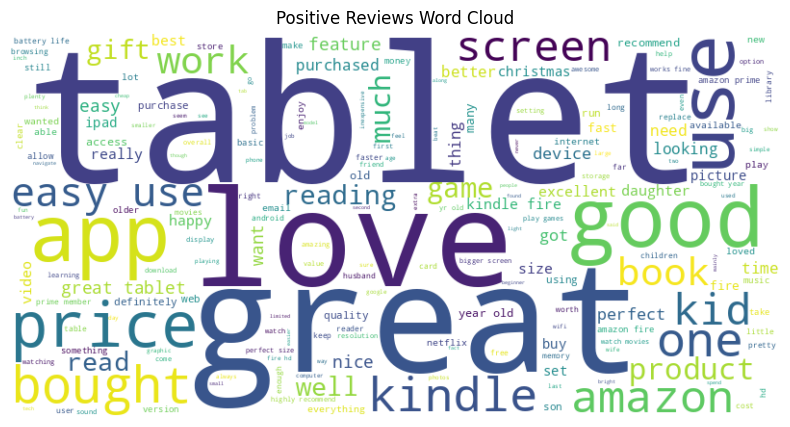

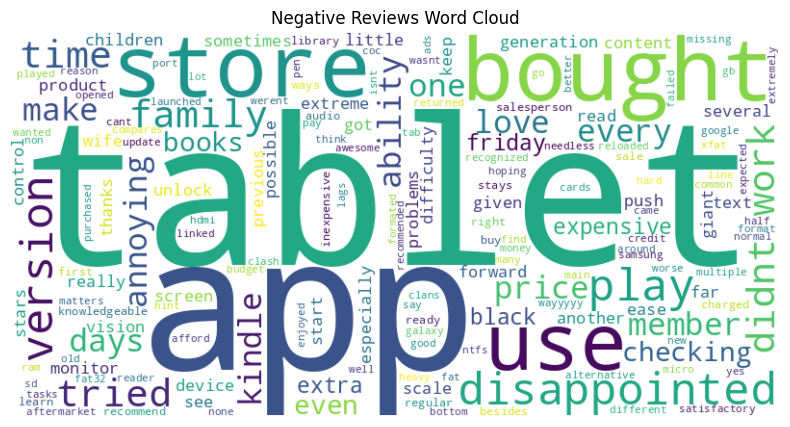

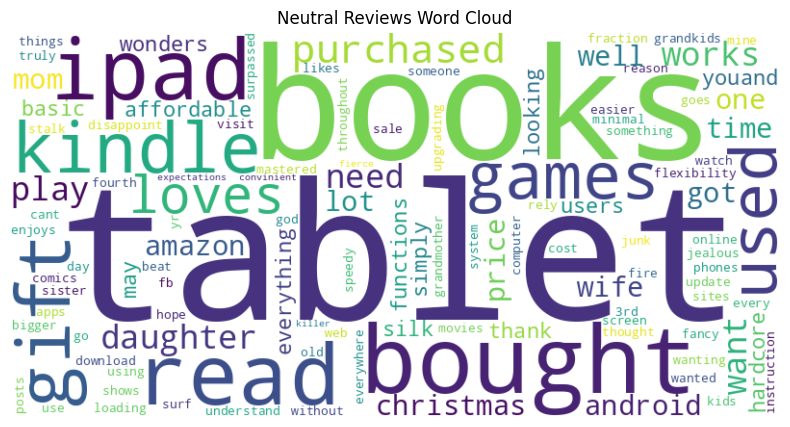

In [38]:
import os
import pandas as pd
import numpy as np
from typing import Dict, List, Union
from langchain.agents import Tool, AgentExecutor, ZeroShotAgent
from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from langchain.chains import LLMChain
from langchain.tools import BaseTool
from pydantic import BaseModel
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import io
import base64



# Preprocess the text data
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
df['cleaned_reviews'] = df['reviews.text'].apply(lambda x: ' '.join([word for word in word_tokenize(str(x).lower()) if word.isalnum() and word not in stop_words]))

class TopicModelingAgent(BaseTool):
    name = "Topic Modeling"
    description = "Identify and extract key topics from the text data"

    def _run(self, query: str) -> Dict:
        vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        tfidf = vectorizer.fit_transform(df['cleaned_reviews'])

        lda = LatentDirichletAllocation(n_components=5, random_state=42)
        lda.fit(tfidf)

        feature_names = vectorizer.get_feature_names_out()
        topics = []
        for topic_idx, topic in enumerate(lda.components_):
            top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
            topics.append(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

        topic_distribution = lda.transform(tfidf)
        dominant_topics = [topics[np.argmax(distribution)] for distribution in topic_distribution]

        return {"topics": topics, "dominant_topics": dominant_topics}

class SentimentAnalysisAgent(BaseTool):
    name = "Sentiment Analysis"
    description = "Determine the sentiment expressed in the text"

    def _run(self, query: str) -> Dict:
        sentiments = []
        scores = []
        for review in df['cleaned_reviews']:
            analysis = TextBlob(review)
            sentiment = 'Positive' if analysis.sentiment.polarity > 0 else 'Negative' if analysis.sentiment.polarity < 0 else 'Neutral'
            sentiments.append(sentiment)
            scores.append(analysis.sentiment.polarity)
        return {"sentiments": sentiments, "scores": scores}

class ClassificationAgent(BaseTool):
    name = "Classification"
    description = "Categorize the text data into predefined classes"

    def _run(self, query: str) -> Dict:
        vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        X = vectorizer.fit_transform(df['cleaned_reviews'])

        # Create a sample dataset for training
        sample_data = [
            ("I love this product!", "Feedback"),
            ("This product is terrible.", "Complaint"),
            ("How do I use this feature?", "Inquiry"),
            ("It would be great if you could add...", "Suggestion")
        ]
        X_train, y_train = zip(*sample_data)
        X_train = vectorizer.transform(X_train)

        clf = MultinomialNB()
        clf.fit(X_train, y_train)

        predictions = clf.predict(X)
        return {"classifications": predictions}

class ClusteringAgent(BaseTool):
    name = "Clustering"
    description = "Group similar text entries together"

    def _run(self, query: str) -> Dict:
        vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        X = vectorizer.fit_transform(df['cleaned_reviews'])

        clustering_methods = {
            'KMeans': KMeans(n_clusters=5, random_state=42),
            'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
            'AgglomerativeClustering': AgglomerativeClustering(n_clusters=5)
        }

        best_score = -1
        best_method = None
        best_labels = None

        for name, method in clustering_methods.items():
            if name in ['DBSCAN', 'AgglomerativeClustering']:
                labels = method.fit_predict(X.toarray())  # Convert to dense array
            else:
                labels = method.fit_predict(X)

            if len(set(labels)) > 1:  # Ensure we have more than one cluster
                score = silhouette_score(X, labels)
                if score > best_score:
                    best_score = score
                    best_method = name
                    best_labels = labels

        # Generate cluster descriptions
        cluster_descriptions = []
        for cluster in set(best_labels):
            cluster_docs = df['cleaned_reviews'][best_labels == cluster]
            if not cluster_docs.empty:
                top_words_idx = vectorizer.transform(cluster_docs).sum(axis=0).A1.argsort()[-10:]
                top_words = [vectorizer.get_feature_names_out()[i] for i in reversed(top_words_idx)]
                description = f"Cluster {cluster}: {', '.join(top_words)}"
                cluster_descriptions.append(description)

        return {
            "clusters": best_labels,
            "best_method": best_method,
            "cluster_descriptions": cluster_descriptions
        }



class VisualizationAgent(BaseTool):
    name = "Visualization"
    description = "Create visualizations based on the analysis results"

    def _run(self, results: Dict) -> None:
        app = Dash(__name__)

        # Create word clouds
        def create_wordcloud(text, title):
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(title)
            img = io.BytesIO()
            plt.savefig(img, format='png')
            img.seek(0)
            return base64.b64encode(img.getvalue()).decode()

        positive_text = ' '.join(df[df['sentiment_label'] == 'Positive']['cleaned_reviews'])
        negative_text = ' '.join(df[df['sentiment_label'] == 'Negative']['cleaned_reviews'])
        neutral_text = ' '.join(df[df['sentiment_label'] == 'Neutral']['cleaned_reviews'])

        positive_wordcloud = create_wordcloud(positive_text, 'Positive Reviews Word Cloud')
        negative_wordcloud = create_wordcloud(negative_text, 'Negative Reviews Word Cloud')
        neutral_wordcloud = create_wordcloud(neutral_text, 'Neutral Reviews Word Cloud')

        app.layout = html.Div([
            html.H1("Amazon Reviews Analysis Dashboard"),

            dcc.Tabs([
                dcc.Tab(label='Topic Modeling', children=[
                    dcc.Graph(id='topic-chart'),
                    dcc.Graph(id='avg-sentiment-topic')
                ]),
                dcc.Tab(label='Sentiment Analysis', children=[
                    dcc.Graph(id='sentiment-chart'),
                    html.Img(src=f"data:image/png;base64,{positive_wordcloud}"),
                    html.Img(src=f"data:image/png;base64,{negative_wordcloud}"),
                    html.Img(src=f"data:image/png;base64,{neutral_wordcloud}")
                ]),
                dcc.Tab(label='Classification', children=[
                    dcc.Graph(id='classification-chart'),
                    dcc.Graph(id='heatmap-sentiment-topic-category')
                ]),
                dcc.Tab(label='Clustering', children=[
                    dcc.Graph(id='cluster-chart'),
                    html.Div(id='cluster-descriptions')
                ]),
                dcc.Tab(label='Word Frequency', children=[
                    dcc.Graph(id='word-frequency-chart')
                ])
            ])
        ])

        @app.callback(Output('topic-chart', 'figure'),
                      Input('topic-chart', 'id'))
        def update_topic_chart(_):
            topic_counts = pd.Series(results['topics']['dominant_topics']).value_counts()
            fig = px.bar(topic_counts, x=topic_counts.index, y=topic_counts.values, title="Topic Distribution")
            return fig

        @app.callback(Output('sentiment-chart', 'figure'),
                      Input('sentiment-chart', 'id'))
        def update_sentiment_chart(_):
            sentiment_counts = pd.Series(results['sentiments']['sentiments']).value_counts()
            fig = px.pie(values=sentiment_counts.values, names=sentiment_counts.index, title="Sentiment Distribution")
            return fig

        @app.callback(Output('classification-chart', 'figure'),
                      Input('classification-chart', 'id'))
        def update_classification_chart(_):
            classification_counts = pd.Series(results['classifications']).value_counts()
            fig = px.bar(classification_counts, x=classification_counts.index, y=classification_counts.values, title="Review Classifications")
            return fig

        @app.callback(Output('cluster-chart', 'figure'),
                      Input('cluster-chart', 'id'))
        def update_cluster_chart(_):
            fig = px.scatter(df, x='reviews.rating', y='reviews.numHelpful', color=results['clusters'], title="Review Clusters")
            return fig

        @app.callback(Output('cluster-descriptions', 'children'),
                      Input('cluster-descriptions', 'id'))
        def update_cluster_descriptions(_):
            return html.Ul([html.Li(desc) for desc in results['cluster_descriptions']])

        @app.callback(Output('avg-sentiment-topic', 'figure'),
                      Input('avg-sentiment-topic', 'id'))
        def update_avg_sentiment_topic(_):
            df['topic'] = results['dominant_topics']
            df['sentiment_score'] = results['scores']
            avg_sentiment = df.groupby('topic')['sentiment_score'].mean().sort_values(ascending=False)
            fig = px.bar(avg_sentiment, x=avg_sentiment.index, y=avg_sentiment.values, title="Average Sentiment Score per Topic")
            return fig

        @app.callback(Output('heatmap-sentiment-topic-category', 'figure'),
                      Input('heatmap-sentiment-topic-category', 'id'))
        def update_heatmap_sentiment_topic_category(_):
            df['topic'] = results['dominant_topics']
            df['sentiment_score'] = results['scores']
            df['category'] = results['classifications']
            pivot_table = df.pivot_table(values='sentiment_score', index='topic', columns='category', aggfunc='mean')
            fig = px.imshow(pivot_table, title="Heatmap of Sentiment Scores by Topic and Category")
            return fig

        @app.callback(Output('word-frequency-chart', 'figure'),
                      Input('word-frequency-chart', 'id'))
        def update_word_frequency_chart(_):
            vectorizer = CountVectorizer(stop_words='english', max_features=20)
            word_freq = vectorizer.fit_transform(df['cleaned_reviews'])
            words = vectorizer.get_feature_names_out()
            freqs = word_freq.sum(axis=0).A1
            word_freq_df = pd.DataFrame({'word': words, 'frequency': freqs})
            word_freq_df = word_freq_df.sort_values('frequency', ascending=False)
            fig = px.bar(word_freq_df, x='word', y='frequency', title="Top 20 Most Frequent Words")
            return fig

        app.run_server(debug=True, use_reloader=False)

# Create instances of each agent
topic_modeling_agent = TopicModelingAgent()
sentiment_analysis_agent = SentimentAnalysisAgent()
classification_agent = ClassificationAgent()
clustering_agent = ClusteringAgent()
visualization_agent = VisualizationAgent()

# Define tools for the main agent
tools = [
    Tool(
        name="Topic Modeling",
        func=topic_modeling_agent._run,
        description="Use this tool to identify and extract key topics from the text data"
    ),
    Tool(
        name="Sentiment Analysis",
        func=sentiment_analysis_agent._run,
        description="Use this tool to determine the sentiment expressed in the text"
    ),
    Tool(
        name="Classification",
        func=classification_agent._run,
        description="Use this tool to categorize the text data into predefined classes"
    ),
    Tool(
        name="Clustering",
        func=clustering_agent._run,
        description="Use this tool to group similar text entries together"
    ),
    Tool(
        name="Visualization",
        func=visualization_agent._run,
        description="Use this tool to create visualizations based on the analysis results"
    )
]

# Create the main agent
prefix = """You are an AI coordinator tasked with analyzing Amazon reviews. You have access to multiple specialized agents. Your goal is to use these agents to provide comprehensive insights."""
suffix = """Begin!

Question: {input}
{agent_scratchpad}"""

prompt = ZeroShotAgent.create_prompt(
    tools,
    prefix=prefix,
    suffix=suffix,
    input_variables=["input", "agent_scratchpad"]
)

llm = ChatOpenAI(temperature=0)
llm_chain = LLMChain(llm=llm, prompt=prompt)
agent = ZeroShotAgent(llm_chain=llm_chain, tools=tools, verbose=True)
agent_executor = AgentExecutor.from_agent_and_tools(agent=agent, tools=tools, verbose=True)

# Run the analysis
result = agent_executor.run("Analyze reviews provide insights using available tools.")
print(result)

# Update the DataFrame with results from each agent
topic_results = topic_modeling_agent._run("")
df['topic'] = topic_results['dominant_topics']
sentiment_results = sentiment_analysis_agent._run("")
df['sentiment_score'] = sentiment_results['scores']
df['sentiment_label'] = sentiment_results['sentiments']
classification_results = classification_agent._run("")
df['category'] = classification_results['classifications']
clustering_results = clustering_agent._run("")
df['cluster'] = clustering_results['clusters']
df['cluster_description'] = [clustering_results['cluster_descriptions'][i] for i in df['cluster']]

# Display the enhanced DataFrame
print("Enhanced DataFrame:")
print(df.head())

# Create and display the dashboard
visualization_agent._run({
    'topics': topic_results,
    'sentiments': sentiment_results,
    'classifications': classification_results,
    'clusters': clustering_results
})


Fixing the graphs

In [31]:
pip install langchain_openai  dash

  Using cached langchain_openai-0.1.20-py3-none-any.whl.metadata (2.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.2 MB/s eta 0:00:00


### Final Dashboard used in report

In [39]:
import os
import pandas as pd
import numpy as np
from typing import Dict, List, Union
from langchain.agents import Tool, AgentExecutor, ZeroShotAgent
from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from langchain.chains import LLMChain
from langchain.tools import BaseTool
from pydantic import BaseModel
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import io
import base64

# Ensure nltk resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Assuming df is already loaded
df['cleaned_reviews'] = df['reviews.text'].apply(lambda x: ' '.join([word for word in word_tokenize(str(x).lower()) if word.isalnum() and word not in stopwords.words('english')]))

# Define the agents
class TopicModelingAgent(BaseTool):
    name = "Topic Modeling"
    description = "Identify and extract key topics from the text data"

    def _run(self, query: str) -> Dict:
        vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        tfidf = vectorizer.fit_transform(df['cleaned_reviews'])

        lda = LatentDirichletAllocation(n_components=5, random_state=42)
        lda.fit(tfidf)

        feature_names = vectorizer.get_feature_names_out()
        topics = []
        for topic_idx, topic in enumerate(lda.components_):
            top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
            topics.append(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

        topic_distribution = lda.transform(tfidf)
        dominant_topics = [topics[np.argmax(distribution)] for distribution in topic_distribution]

        return {"topics": topics, "dominant_topics": dominant_topics}

class SentimentAnalysisAgent(BaseTool):
    name = "Sentiment Analysis"
    description = "Determine the sentiment expressed in the text"

    def _run(self, query: str) -> Dict:
        sentiments = []
        scores = []
        for review in df['cleaned_reviews']:
            analysis = TextBlob(review)
            sentiment = 'Positive' if analysis.sentiment.polarity > 0 else 'Negative' if analysis.sentiment.polarity < 0 else 'Neutral'
            sentiments.append(sentiment)
            scores.append(analysis.sentiment.polarity)
        return {"sentiments": sentiments, "scores": scores}

class ClassificationAgent(BaseTool):
    name = "Classification"
    description = "Categorize the text data into predefined classes"

    def _run(self, query: str) -> Dict:
        vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        X = vectorizer.fit_transform(df['cleaned_reviews'])

        # Create a sample dataset for training
        sample_data = [
            ("I love this product!", "Feedback"),
            ("This product is terrible.", "Complaint"),
            ("How do I use this feature?", "Inquiry"),
            ("It would be great if you could add...", "Suggestion")
        ]
        X_train, y_train = zip(*sample_data)
        X_train = vectorizer.transform(X_train)

        clf = MultinomialNB()
        clf.fit(X_train, y_train)

        predictions = clf.predict(X)
        return {"classifications": predictions}

class ClusteringAgent(BaseTool):
    name = "Clustering"
    description = "Group similar text entries together"

    def _run(self, query: str) -> Dict:
        vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        X = vectorizer.fit_transform(df['cleaned_reviews'])

        clustering_methods = {
            'KMeans': KMeans(n_clusters=3, random_state=42),
            'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
            'AgglomerativeClustering': AgglomerativeClustering(n_clusters=3)
        }

        best_score = -1
        best_method = None
        best_labels = None

        for name, method in clustering_methods.items():
            if name in ['DBSCAN', 'AgglomerativeClustering']:
                labels = method.fit_predict(X.toarray())  # Convert to dense array
            else:
                labels = method.fit_predict(X)

            if len(set(labels)) > 1:  # Ensure we have more than one cluster
                score = silhouette_score(X, labels)
                if score > best_score:
                    best_score = score
                    best_method = name
                    best_labels = labels

        # Generate cluster descriptions
        cluster_descriptions = []
        for cluster in set(best_labels):
            cluster_docs = df['cleaned_reviews'][best_labels == cluster]
            if not cluster_docs.empty:
                top_words_idx = vectorizer.transform(cluster_docs).sum(axis=0).A1.argsort()[-10:]
                top_words = [vectorizer.get_feature_names_out()[i] for i in reversed(top_words_idx)]
                description = f"Cluster {cluster}: {', '.join(top_words)}"
                cluster_descriptions.append(description)

        return {
            "clusters": best_labels,
            "best_method": best_method,
            "cluster_descriptions": cluster_descriptions
        }

class VisualizationAgent(BaseTool):
    name = "Visualization"
    description = "Create visualizations based on the analysis results"

    def _run(self, results: Dict) -> None:
        app = Dash(__name__)

        # Create word clouds
        def create_wordcloud(text, title):
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(title)
            img = io.BytesIO()
            plt.savefig(img, format='png')
            img.seek(0)
            return base64.b64encode(img.getvalue()).decode()

        app.layout = html.Div([
            html.H1("Amazon Reviews Analysis Dashboard"),

            dcc.Tabs([
                dcc.Tab(label='Topic Modeling', children=[
                    dcc.Graph(id='topic-chart'),
                    dcc.Graph(id='avg-sentiment-topic')
                ]),
                dcc.Tab(label='Sentiment Analysis', children=[
                    dcc.Graph(id='sentiment-chart'),
                    html.Div(id='wordclouds')
                ]),
                dcc.Tab(label='Classification', children=[
                    dcc.Graph(id='classification-chart'),
                    dcc.Graph(id='heatmap-sentiment-topic-category')
                ]),
                dcc.Tab(label='Clustering', children=[
                    dcc.Graph(id='cluster-chart'),
                    html.Div(id='cluster-descriptions')
                ]),
                dcc.Tab(label='Word Frequency', children=[
                    dcc.Graph(id='word-frequency-chart')
                ])
            ])
        ])

        @app.callback(Output('topic-chart', 'figure'),
                      Input('topic-chart', 'id'))
        def update_topic_chart(_):
            topic_counts = pd.Series(results['topics']['dominant_topics']).value_counts()
            fig = px.bar(topic_counts, x=topic_counts.index, y=topic_counts.values, title="Topic Distribution")
            return fig

        @app.callback(Output('sentiment-chart', 'figure'),
                      Input('sentiment-chart', 'id'))
        def update_sentiment_chart(_):
            sentiment_counts = pd.Series(results['sentiments']['sentiments']).value_counts()
            fig = px.pie(values=sentiment_counts.values, names=sentiment_counts.index, title="Sentiment Distribution")
            return fig

        @app.callback(Output('wordclouds', 'children'),
                      Input('wordclouds', 'id'))
        def update_wordclouds(_):
            positive_text = ' '.join(df[df['sentiment_label'] == 'Positive']['cleaned_reviews'])
            negative_text = ' '.join(df[df['sentiment_label'] == 'Negative']['cleaned_reviews'])
            neutral_text = ' '.join(df[df['sentiment_label'] == 'Neutral']['cleaned_reviews'])

            positive_wordcloud = create_wordcloud(positive_text, 'Positive Reviews Word Cloud')
            negative_wordcloud = create_wordcloud(negative_text, 'Negative Reviews Word Cloud')
            neutral_wordcloud = create_wordcloud(neutral_text, 'Neutral Reviews Word Cloud')

            return [
                html.Img(src=f"data:image/png;base64,{positive_wordcloud}"),
                html.Img(src=f"data:image/png;base64,{negative_wordcloud}"),
                html.Img(src=f"data:image/png;base64,{neutral_wordcloud}")
            ]

        @app.callback(Output('classification-chart', 'figure'),
                      Input('classification-chart', 'id'))
        def update_classification_chart(_):
            classification_counts = pd.Series(results['classifications']['classifications']).value_counts()
            fig = px.bar(classification_counts, x=classification_counts.index, y=classification_counts.values, title="Review Classifications")
            return fig

        @app.callback(Output('cluster-chart', 'figure'),
                      Input('cluster-chart', 'id'))
        def update_cluster_chart(_):
            df_clustered = df.copy()
            df_clustered['cluster'] = results['clusters']['clusters']

            # Create a new column for jittered x and y values
            df_clustered['rating_jitter'] = df_clustered['reviews.rating'] + np.random.normal(0, 0.1, len(df_clustered))
            df_clustered['helpful_jitter'] = df_clustered['reviews.numHelpful'] + np.random.normal(0, 0.1, len(df_clustered))

            fig = px.scatter(df_clustered, x='rating_jitter', y='helpful_jitter', color='cluster',
                             title=f"Clustering Results ({results['clusters']['best_method']})",
                             labels={'rating_jitter': 'Review Rating', 'helpful_jitter': 'Number of Helpful Votes'},
                             opacity=0.7)

            fig.update_traces(marker=dict(size=5))
            fig.update_layout(xaxis_range=[0, 5.5], yaxis_range=[-1, df_clustered['reviews.numHelpful'].max() + 1])

            return fig

        @app.callback(Output('cluster-descriptions', 'children'),
                      Input('cluster-descriptions', 'id'))
        def update_cluster_descriptions(_):
            return html.Ul([html.Li(desc) for desc in results['clusters']['cluster_descriptions']])

        @app.callback(Output('avg-sentiment-topic', 'figure'),
                      Input('avg-sentiment-topic', 'id'))
        def update_avg_sentiment_topic(_):
            df['topic'] = results['topics']['dominant_topics']
            df['sentiment_score'] = results['sentiments']['scores']
            avg_sentiment = df.groupby('topic')['sentiment_score'].mean().sort_values(ascending=False)
            fig = px.bar(avg_sentiment, x=avg_sentiment.index, y=avg_sentiment.values, title="Average Sentiment Score per Topic")
            return fig

        @app.callback(Output('heatmap-sentiment-topic-category', 'figure'),
                      Input('heatmap-sentiment-topic-category', 'id'))
        def update_heatmap_sentiment_topic_category(_):
            df['topic'] = results['topics']['dominant_topics']
            df['sentiment_score'] = results['sentiments']['scores']
            df['category'] = results['classifications']['classifications']
            pivot_table = df.pivot_table(values='sentiment_score', index='topic', columns='category', aggfunc='mean')
            fig = px.imshow(pivot_table, title="Heatmap of Sentiment Scores by Topic and Category")
            return fig

        @app.callback(Output('word-frequency-chart', 'figure'),
              Input('word-frequency-chart', 'id'))
        def update_word_frequency_chart(_):
            vectorizer = CountVectorizer(stop_words='english', max_features=20)
            word_freq = vectorizer.fit_transform(df['cleaned_reviews'])
            words = vectorizer.get_feature_names_out()
            freqs = word_freq.sum(axis=0).A1
            word_freq_df = pd.DataFrame({'word': words, 'frequency': freqs})
            word_freq_df = word_freq_df.sort_values('frequency', ascending=False)
            fig = px.bar(word_freq_df, x='word', y='frequency', title="Top 20 Most Frequent Words")
            return fig


        app.run_server(debug=True, use_reloader=False)

# Define the tools and the main agent
prefix = """You are an AI coordinator tasked with analyzing Amazon reviews. You have access to multiple specialized agents. Your goal is to use these agents to provide comprehensive insights."""
suffix = """Begin!

Question: {input}
{agent_scratchpad}"""

prompt = ZeroShotAgent.create_prompt(
    tools=[TopicModelingAgent(), SentimentAnalysisAgent(), ClassificationAgent(), ClusteringAgent(), VisualizationAgent()],
    prefix=prefix,
    suffix=suffix,
    input_variables=["input", "agent_scratchpad"]
)

llm = ChatOpenAI(temperature=0)
llm_chain = LLMChain(llm=llm, prompt=prompt)
agent = ZeroShotAgent(llm_chain=llm_chain, tools=[TopicModelingAgent(), SentimentAnalysisAgent(), ClassificationAgent(), ClusteringAgent(), VisualizationAgent()], verbose=True)
agent_executor = AgentExecutor.from_agent_and_tools(agent=agent, tools=[TopicModelingAgent(), SentimentAnalysisAgent(), ClassificationAgent(), ClusteringAgent(), VisualizationAgent()], verbose=True)

# Run the analysis
result = agent_executor.run("Analyze reviews provide insights using available tools.")
print(result)

# Update the DataFrame with results from each agent
topic_results = TopicModelingAgent()._run("")
df['topic'] = topic_results['dominant_topics']
sentiment_results = SentimentAnalysisAgent()._run("")
df['sentiment_score'] = sentiment_results['scores']
df['sentiment_label'] = sentiment_results['sentiments']
classification_results = ClassificationAgent()._run("")
df['category'] = classification_results['classifications']
clustering_results = ClusteringAgent()._run("")
df['cluster'] = clustering_results['clusters']
df['cluster_description'] = [clustering_results['cluster_descriptions'][i] for i in df['cluster']]

# Display the enhanced DataFrame
df.head()

# Create and display the dashboard
visualization_agent = VisualizationAgent()
visualization_agent._run({
    'topics': topic_results,
    'sentiments': sentiment_results,
    'classifications': classification_results,
    'clusters': clustering_results
})


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!




> Entering new AgentExecutor chain...
Thought: I should start by identifying key topics in the reviews.
Action: Topic Modeling
Action Input: Amazon reviews text data
Observation: {'topics': ['Topic 1: great, tablet, apps, loves, bought, gift, amazon, wife, tablets, reading', 'Topic 2: tablet, great, easy, like, navigate, use, best, bought, apps, price', 'Topic 3: love, bought, tablet, great, works, use, good, kindle, gift, old', 'Topic 4: use, tablet, good, easy, love, great, picture, kindle, better, want', 'Topic 5: tablet, games, kindle, books, nice, easy, screen, great, reading, daughter'], 'dominant_topics': ['Topic 4: use, tablet, good, easy, love, great, picture, kindle, better, want', 'Topic 1: great, tablet, apps, loves, bought, gift, amazon, wife, tablets, reading', 'Topic 4: use, tablet, good, easy, love, great, picture, kindle, better, want', 'Topic 5: tablet, games, kindle, books, nice, easy, screen, great, reading, daughter', 'Topic 2: tablet, great, easy, like, navigate

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



I have grouped similar text entries in the Amazon reviews into clusters.
Action: Visualization
Action Input: Clustering results

<IPython.core.display.Javascript object>


Observation: None
Thought:I have completed all the necessary analysis steps.
Final Answer: The Amazon reviews have been analyzed, key topics identified, sentiment determined, text data categorized, similar entries grouped, and results visualized.

> Finished chain.
The Amazon reviews have been analyzed, key topics identified, sentiment determined, text data categorized, similar entries grouped, and results visualized.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



<IPython.core.display.Javascript object>

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 299
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   300 non-null    object 
 1   name                 300 non-null    object 
 2   asins                300 non-null    object 
 3   brand                300 non-null    object 
 4   categories           300 non-null    object 
 5   keys                 300 non-null    object 
 6   manufacturer         300 non-null    object 
 7   reviews.date         300 non-null    object 
 8   reviews.dateAdded    300 non-null    object 
 9   reviews.dateSeen     300 non-null    object 
 10  reviews.doRecommend  300 non-null    object 
 11  reviews.numHelpful   300 non-null    float64
 12  reviews.rating       300 non-null    float64
 13  reviews.sourceURLs   300 non-null    object 
 14  reviews.text         300 non-null    object 
 15  reviews.title        300 non-null    object 


Checking the results manually

In [41]:
df[['reviews.text','category']]

,reviews.text,category
0,This product so far has not disappointed. My c...,Feedback
1,great for beginner or experienced person. Boug...,Suggestion
2,Inexpensive tablet for him to use and learn on...,Inquiry
3,I've had my Fire HD 8 two weeks now and I love...,Feedback
4,I bought this for my grand daughter when she c...,Complaint
...,...,...
295,"My mom had an old one, she was so excited to g...",Complaint
296,Works great and is fast. Great for reading and...,Suggestion
297,This Kindle is so overloaded with apps that I ...,Inquiry
298,"Fine for reading, ...haven't used it for anyth...",Complaint


In [42]:
df[['reviews.text','cluster']]

,reviews.text,cluster
0,This product so far has not disappointed. My c...,1
1,great for beginner or experienced person. Boug...,1
2,Inexpensive tablet for him to use and learn on...,1
3,I've had my Fire HD 8 two weeks now and I love...,2
4,I bought this for my grand daughter when she c...,1
...,...,...
295,"My mom had an old one, she was so excited to g...",1
296,Works great and is fast. Great for reading and...,1
297,This Kindle is so overloaded with apps that I ...,2
298,"Fine for reading, ...haven't used it for anyth...",1


In [43]:
df[['reviews.text','cluster_description']]

,reviews.text,cluster_description
0,This product so far has not disappointed. My c...,"Cluster 1: great, tablet, good, bought, price,..."
1,great for beginner or experienced person. Boug...,"Cluster 1: great, tablet, good, bought, price,..."
2,Inexpensive tablet for him to use and learn on...,"Cluster 1: great, tablet, good, bought, price,..."
3,I've had my Fire HD 8 two weeks now and I love...,"Cluster 2: tablet, love, amazon, great, recomm..."
4,I bought this for my grand daughter when she c...,"Cluster 1: great, tablet, good, bought, price,..."
...,...,...
295,"My mom had an old one, she was so excited to g...","Cluster 1: great, tablet, good, bought, price,..."
296,Works great and is fast. Great for reading and...,"Cluster 1: great, tablet, good, bought, price,..."
297,This Kindle is so overloaded with apps that I ...,"Cluster 2: tablet, love, amazon, great, recomm..."
298,"Fine for reading, ...haven't used it for anyth...","Cluster 1: great, tablet, good, bought, price,..."


In [44]:
df[['reviews.text','topic']]

,reviews.text,topic
0,This product so far has not disappointed. My c...,"Topic 4: use, tablet, good, easy, love, great,..."
1,great for beginner or experienced person. Boug...,"Topic 1: great, tablet, apps, loves, bought, g..."
2,Inexpensive tablet for him to use and learn on...,"Topic 4: use, tablet, good, easy, love, great,..."
3,I've had my Fire HD 8 two weeks now and I love...,"Topic 5: tablet, games, kindle, books, nice, e..."
4,I bought this for my grand daughter when she c...,"Topic 2: tablet, great, easy, like, navigate, ..."
...,...,...
295,"My mom had an old one, she was so excited to g...","Topic 3: love, bought, tablet, great, works, u..."
296,Works great and is fast. Great for reading and...,"Topic 1: great, tablet, apps, loves, bought, g..."
297,This Kindle is so overloaded with apps that I ...,"Topic 1: great, tablet, apps, loves, bought, g..."
298,"Fine for reading, ...haven't used it for anyth...","Topic 2: tablet, great, easy, like, navigate, ..."


In [45]:
df[['reviews.text','sentiment_label']]

,reviews.text,sentiment_label
0,This product so far has not disappointed. My c...,Negative
1,great for beginner or experienced person. Boug...,Positive
2,Inexpensive tablet for him to use and learn on...,Positive
3,I've had my Fire HD 8 two weeks now and I love...,Positive
4,I bought this for my grand daughter when she c...,Positive
...,...,...
295,"My mom had an old one, she was so excited to g...",Positive
296,Works great and is fast. Great for reading and...,Positive
297,This Kindle is so overloaded with apps that I ...,Positive
298,"Fine for reading, ...haven't used it for anyth...",Positive
